In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from scipy import stats
from CoreBx_funcs import UTM2Island, which_computer, yaml2dict, stat_summary

import warnings
warnings.filterwarnings('ignore')

drv, _ = which_computer()
print(drv)

indir = drv+'crs/proj/2019_DorianOBX/Dorian_paper_analyses/'
outdir = drv+'crs/proj/2019_DorianOBX/Dorian_paper_analyses/figs/'

cols=['#feedde','#fdbe85','#fd8d3c','#e6550d','#a63603']
blue5=['#f1eef6','#bdc9e1','#bdc9e1','#2b8cbe','#045a8d']

D:/


### load statistics file from Jin-Si, Aug 12, 2022

In [2]:
df = pd.read_csv(indir+'NCB_postDorian_stats_2022.csv')
# Apply threshold for channel cross-sectional area
athresh = 5.
df = df[ -df['Throat_width_m']*df['Throat_depth_avg_m'] > athresh]
df.describe()

,Rowid,Shape_Area,Perimeter_m,MIN_elev,MAX_elev,RANGE_elev,MEAN_elev,STD_elev,Volume_m3,Volume,...,W:T,Ch_Type,Convex_Hull_perimeter_m,Polygon_area_outside_overwash_m2,%outwash outside of overwash,R1,R2,DI,II,Cr
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,...,84.000000,84.000000,84.000000,79.000000,79.000000,84.000000,84.000000,84.000000,79.000000,79.000000
mean,44.357143,13158.786548,1777.198983,-3.561412,0.232668,3.790496,-1.123526,0.629740,-17558.818372,17558.818372,...,2.040637,1.821429,492.891983,6242.787342,36.070000,0.077060,0.604786,3.873631,3.181554,0.079446
std,25.467978,16307.215439,1559.268439,1.293353,0.294817,1.454502,0.389047,0.185981,22006.319053,22006.319053,...,0.691143,0.907276,322.400319,8675.207930,22.136483,0.077558,0.114728,1.296250,1.173955,0.079357
min,1.000000,46.000000,36.527041,-6.462904,-0.150000,0.526728,-1.642211,0.097799,-103087.401800,33.969471,...,0.881428,1.000000,28.741685,0.000000,0.000000,0.016000,0.380000,1.313000,1.217296,0.016463
25%,22.750000,1424.500000,434.661931,-4.552779,0.072750,2.776388,-1.366810,0.513920,-23447.132852,1324.971122,...,1.631887,1.000000,224.146936,141.100000,16.410000,0.034000,0.523500,2.872500,2.122655,0.034675
50%,44.500000,7757.000000,1360.341817,-3.631056,0.143000,3.801238,-1.209550,0.661814,-10045.250682,10045.250682,...,1.918956,2.000000,465.478675,2870.500000,36.320000,0.051000,0.603000,3.838500,3.219695,0.050848
75%,66.250000,18137.500000,2459.177961,-2.684154,0.292000,4.838529,-0.998833,0.787813,-1324.971122,23447.132852,...,2.499492,2.000000,694.915800,8683.400000,54.345000,0.090250,0.684500,4.690750,4.101269,0.092539
max,87.000000,89088.000000,5990.596720,-0.676728,1.537000,7.747000,1.164000,0.965698,-33.969471,103087.401800,...,3.803744,5.000000,1530.000000,34979.900000,80.940000,0.433000,0.859000,6.736000,6.055575,0.433375


In [3]:
# Read in a dict that defines the rotated "island" coordinate system
#  name
#  e0 - UTM Easting of origin [m]
#  n0 - UTM Northing of origin [m]
#  xlen - Length of alongshore axis [m]
#  ylen - Length of cross-shore axis [m]
#  dxdy - grid size (must be isotropic right now) [m]
#  theta - rotation CCW from x-axis [deg]
#  xs_end - number of grid cells to approximate limit of overwash terrace
#  d_end - number of grid cells to 
r = yaml2dict('small_island_box.yml')
print(r)

{'name': 'ncorebx_small', 'e0': 383520.0, 'n0': 3860830.0, 'xlen': 25000.0, 'ylen': 1200.0, 'dxdy': 1.0, 'theta': 42.0}


In [4]:
xchan, ychan = UTM2Island( df['CENTROID_X'].values, df['CENTROID_Y'].values, eoff=r['e0'], noff=r['n0'], rot=r['theta'] )

In [5]:
channel_avg_depth = -df['Throat_depth_avg_m'].values # make channel depths positive
channel_width = df['Throat_width_m'].values
channel_max_depth = -df['Throat_Depth_max_m'].values
channel_area = channel_width*channel_avg_depth
# hydraulic radius
Rh = channel_area/(2.*channel_avg_depth+channel_width)

print('September:')
print('Channel depths:')
cz0 = stat_summary(channel_avg_depth,iprint=True)
print('Channel widths:')
cw0 = stat_summary(channel_width,iprint=True)
print('Channel areas:')
ca0 = stat_summary(channel_area,iprint=True)

print('Rh stats:')
Rh_stats = stat_summary(Rh,iprint=True)

September:
Channel depths:
  n, nnan, nvalid:  84 0 84
  mean, std, min, max   : 1.571 0.566 0.450 2.990
  d5, d25, d50, d75, d95: 0.619 1.160 1.590 1.932 2.469
Channel widths:
  n, nnan, nvalid:  84 0 84
  mean, std, min, max   : 62.960 56.526 6.780 360.000
  d5, d25, d50, d75, d95: 12.000 22.975 53.000 76.625 171.850
Channel areas:
  n, nnan, nvalid:  84 0 84
  mean, std, min, max   : 111.743 111.662 5.610 572.400
  d5, d25, d50, d75, d95: 7.811 27.080 85.148 151.126 375.039
Rh stats:
  n, nnan, nvalid:  84 0 84
  mean, std, min, max   : 1.462 0.543 0.429 2.855
  d5, d25, d50, d75, d95: 0.563 1.070 1.497 1.824 2.343


In [13]:
### Estimate flow velocity using open-channel flow formula
depth=channel_avg_depth

mann=.025
mann_rough = 0.03
mann_smooth = 0.02
Slope = 1./300.
low_slope = 1/350.
high_slope = 1/250.
konv=1.
rhow = 1027.
rhos = 2650.
d50 = 0.43e-3 # Ruggerio, S. Core Banks
d90 = 1.e-3
# print("Base case")

# d50 = 0.25e-3 # Ruggerio, S. Core Banks
# d90 = 0.34e-3
# print("Fine Sediment case")

# Slope = 1./400.
# print("Low slope case")

# Slope = 1./200.
# print("High slope case")

#mann = 0.02
# print("Smooth n case")

# mann = 0.03
# print("Rough n case")

print("Mannings n {:.3f}, slope {:.4f}, d50 (mm) {:.3f}, d90 (mm) {}".\
     format(mann, Slope, d50*1000, d90*1000))
s = rhos/rhow
nu = 1.36e-6
print('s: ',s)
g = 9.81
Dstar = (g*(s-1)/nu**2)**(1./3.)*d50 # Soulsby eqn 99
ws = (nu/d50)*(np.sqrt(10.36**2+1.049*Dstar**3)-10.36) # Soulsby eqn 102
wstar = ws/((g*(s-1)/nu**2)**(1./3.))
print('Dstar:',Dstar,'ws:',ws,'wstar: ',wstar)

theta_cr = (0.3/(1.+1.2*Dstar))+0.055*(1.-np.exp(-0.020*Dstar)) # Soulsby eqn 77
tauc = theta_cr*(g*rhow*(s-1)*d50)
print('Tauc =',tauc)

# fric = 0.04 # Fig. 3.3 in Dyer - not used
# Cdf = fric/8.
Cdn =   g*mann**2/(depth**(1./3.))

print("Cdn")
stat_summary(Cdn,iprint=True)
Vel   = (konv/mann)*Rh**(2./3.)*np.sqrt(Slope)
Vello = (konv/mann_rough)*Rh**(2./3.)*np.sqrt(low_slope)
Velhi = (konv/mann_smooth)*Rh**(2./3.)*np.sqrt(high_slope)

Froude = Vel/np.sqrt(g*depth)
tau0   = Cdn*rhow*Vel**2.

print("Froude from Manning")
stat_summary(Froude,iprint=True)
print("Velocity from Manning")
stat_summary(Vel,iprint=True)
print("Tau0 from Manning")
stat_summary(tau0,iprint=True)

Qwater = Vel*channel_area
print('Qwater:')
stat_summary(Qwater,iprint=True)
total_Qwater = np.sum(Qwater)
print('Total water discharge:',total_Qwater)

### Estimate bed stress from bottom stress
# These give similar, but slightly higher numbers
# taub = rhow*g*depth*Slope[1]
# Ubar = np.sqrt(taub/(rhow*Cdn))
# print('Ubar from slope')
# stat_summary(Ubar,iprint=True)
# print('Taub from slope')
# stat_summary(taub,iprint=True)

# Van Rijn (Eqn 133)
Ucr = 0.19*d50**0.1*np.log10(4.*depth/d90)
if d50>0.5e-3:
    Ucr = 8.5*d50**0.6*np.log10(4.*depth/d90)
Ubar = Vel
curly = (Ubar-Ucr)/np.sqrt((s-1)*g*d50)
qbvr = 0.005*Ubar*depth*curly**2.4*(d50/depth)**1.2
qsvr = 0.012*Ubar*depth*curly**2.4*(d50/depth)*Dstar**(-.6)

Ubar = Vello
curly = (Ubar-Ucr)/np.sqrt((s-1)*g*d50)
qbvrlo = 0.005*Ubar*depth*curly**2.4*(d50/depth)**1.2
qsvrlo = 0.012*Ubar*depth*curly**2.4*(d50/depth)*Dstar**(-.6)

Ubar = Velhi
curly = (Ubar-Ucr)/np.sqrt((s-1)*g*d50)
qbvrhi = 0.005*Ubar*depth*curly**2.4*(d50/depth)**1.2
qsvrhi = 0.012*Ubar*depth*curly**2.4*(d50/depth)*Dstar**(-.6)


print('Qb:')
stat_summary(qbvr,iprint=True)
print('Qs:')
stat_summary(qsvr,iprint=True)
total_Qb = np.sum(qbvr*channel_width)
print('Total bedload discharge:',total_Qb)
total_Qs = np.sum(qsvr*channel_width)
print('Total sus. load discharge:',total_Qs)
total_Qbs = total_Qs+total_Qb
print('Total sed. discharge {} m3/hour'.format(total_Qbs*3600))
Vlost = (16.6e6-13.7e6)
Vtime = 0.65*Vlost/total_Qbs
print('Time to erode {} is {} h.'.format(Vlost,Vtime/3600.))

Mannings n 0.025, slope 0.0033, d50 (mm) 0.430, d90 (mm) 1.0
s:  2.5803310613437196
Dstar: 8.734704380597039 ws: 0.05704776349367495 wstar:  2.8083993725959964e-06
Tauc = 0.2392398582172001
Cdn
  n, nnan, nvalid:  84 0 84
  mean, std, min, max   : 0.005 0.001 0.004 0.008
  d5, d25, d50, d75, d95: 0.005 0.005 0.005 0.006 0.007
Froude from Manning
  n, nnan, nvalid:  84 0 84
  mean, std, min, max   : 0.748 0.060 0.618 0.858
  d5, d25, d50, d75, d95: 0.627 0.710 0.762 0.792 0.831
Velocity from Manning
  n, nnan, nvalid:  84 0 84
  mean, std, min, max   : 2.926 0.754 1.313 4.647
  d5, d25, d50, d75, d95: 1.574 2.416 3.023 3.447 4.074
Tau0 from Manning
  n, nnan, nvalid:  84 0 84
  mean, std, min, max   : 47.964 18.029 14.160 94.393
  d5, d25, d50, d75, d95: 18.487 35.582 49.254 59.695 77.502
Qwater:
  n, nnan, nvalid:  84 0 84
  mean, std, min, max   : 382.874 431.576 7.729 1790.266
  d5, d25, d50, d75, d95: 12.105 73.647 255.651 520.150 1607.714
Total water discharge: 32161.392079859837
Q

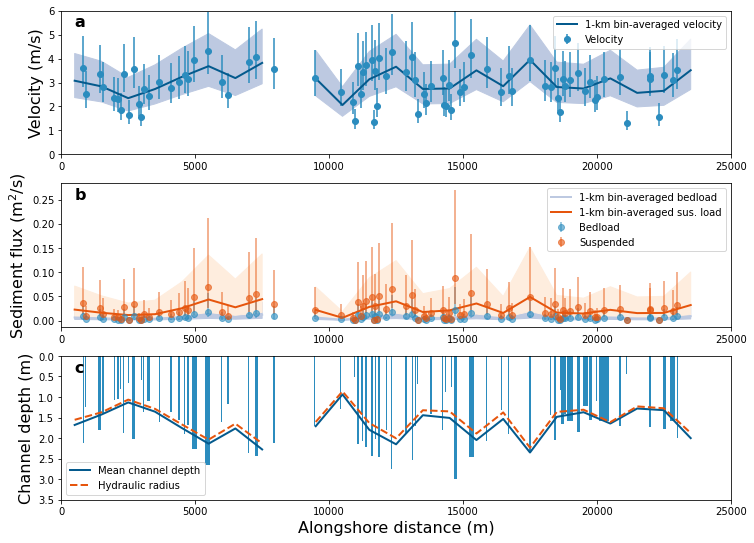

In [14]:
binw = 1000.
bins = np.arange(0.,36001.,binw)
bin_ctr = bins[0:-1]+0.5*binw
data = Vel
digitized = np.digitize(xchan, bins)
bin_mean_vel = [data[digitized == i].mean() for i in range(1, len(bins))]
bin_std_vel  = [data[digitized == i].std() for i in range(1, len(bins))]
bin_std_vel[0]=0.
bin_std_vel[1]=0.
bin_std_vel =np.array(bin_std_vel)
data = Vello
bin_mean_vello = [data[digitized == i].mean() for i in range(1, len(bins))]
data = Velhi
bin_mean_velhi = [data[digitized == i].mean() for i in range(1, len(bins))]

plt.figure(figsize=(12,9))
ax1=plt.subplot(311)
# plt.plot(channel_ctr[ia],Vel,'.',markersize=12,color=blue5[3])
ax1.errorbar(xchan,Vel,yerr=[Vel-Vello, Velhi-Vel], fmt='o',color=blue5[3],label='Velocity')
plt.plot(bin_ctr,bin_mean_vel,'-',color=blue5[4],linewidth=2,label='1-km bin-averaged velocity')
ax1.fill_between(bin_ctr, (bin_mean_vello), (bin_mean_velhi),color=blue5[1] )
ax1.set_anchor('W')
plt.ylim((0, 6))
plt.text(0.02, 0.92,'a',horizontalalignment='left',verticalalignment='center',transform = ax1.transAxes, fontweight='bold', fontsize=16)
plt.legend()
plt.ylabel('Velocity (m/s)',fontsize=16)
plt.xlim((0,25000))

data = qbvr
bin_mean_qb = [data[digitized == i].mean() for i in range(1, len(bins))]
bin_std_qb  = [data[digitized == i].std() for i in range(1, len(bins))]
bin_std_qb[0]=0.
bin_std_qb[1]=0.
bin_std_qb =np.array(bin_std_qb)

data = qbvrlo
bin_mean_qblo = [data[digitized == i].mean() for i in range(1, len(bins))]

data = qbvrhi
bin_mean_qbhi = [data[digitized == i].mean() for i in range(1, len(bins))]

data = qsvr
bin_mean_qs = [data[digitized == i].mean() for i in range(1, len(bins))]
bin_std_qs  = [data[digitized == i].std() for i in range(1, len(bins))]
bin_std_qs[0]=0.
bin_std_qs[1]=0.
bin_std_qs =np.array(bin_std_qs)

data = qsvrhi
bin_mean_qshi = [data[digitized == i].mean() for i in range(1, len(bins))]

data = qsvrlo
bin_mean_qslo = [data[digitized == i].mean() for i in range(1, len(bins))]

ax2=plt.subplot(312)
ax2.errorbar(xchan, qbvr, yerr=[qbvr-qbvrlo, qbvrhi-qbvr], fmt='o',color=blue5[3],alpha=0.6,label='Bedload')
ax2.errorbar(xchan, qsvr, yerr=[qsvr-qsvrlo, qsvrhi-qsvr], fmt='o',color=cols[3],alpha=0.6,label='Suspended')
ax2.plot(bin_ctr,bin_mean_qb,'-',color=blue5[2],linewidth=2,label='1-km bin-averaged bedload')
ax2.fill_between(bin_ctr, (bin_mean_qblo), (bin_mean_qbhi),color=blue5[2] )
ax2.plot(bin_ctr,bin_mean_qs,'-',color=cols[3],linewidth=2,label='1-km bin-averaged sus. load')
ax2.fill_between(bin_ctr, (bin_mean_qslo), (bin_mean_qshi),color=cols[0] )
ax2.set_anchor('W')

plt.legend()
#plt.ylim((0, 5))
plt.text(0.02, 0.92,'b',horizontalalignment='left',verticalalignment='center',transform = ax2.transAxes, fontweight='bold',fontsize=16)
plt.ylabel('Sediment flux (m$^2$/s)',fontsize=16)
plt.xlim((0,25000))

ax3 = plt.subplot(313)
binw = 1000.
bins = np.arange(0.,25001.,binw)

bin_ctr = bins[0:-1]+0.5*binw
data = channel_avg_depth
digitized = np.digitize( xchan, bins)
bin_mean = [data[digitized == i].mean() for i in range(1, len(bins))]
bin_std = [data[digitized == i].std() for i in range(1, len(bins))]

data= Rh
Rh_mean = [data[digitized == i].mean() for i in range(1, len(bins))]
Rh_std = [data[digitized == i].std() for i in range(1, len(bins))]


plt.bar(xchan,channel_avg_depth,width=channel_width,color=blue5[3])
plt.plot(bin_ctr,bin_mean,'-',color=blue5[4],linewidth=2,label='Mean channel depth')
plt.plot(bin_ctr,Rh_mean,'--',color=cols[3],linewidth=2,label='Hydraulic radius')
plt.ylim((3.5,0))
plt.text(0.02, 0.92,'c',horizontalalignment='left',verticalalignment='center',transform = ax3.transAxes, fontweight='bold', fontsize=16)
plt.xlabel('Alongshore distance (m)',fontsize=16)
plt.ylabel('Channel depth (m)',fontsize=16)
plt.legend()
plt.xlim((0,25000))

plt.savefig(outdir+'arc_velocity_sed_transport_island.svg',bbox_inches='tight', format='svg', dpi = 200)